In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [9]:
url = 'https://raw.githubusercontent.com/FedericoCantarelli/Customer-Satisfaction-Yojo/main/data/processed/final_down.csv'
url_pca = 'https://raw.githubusercontent.com/FedericoCantarelli/Customer-Satisfaction-Yojo/main/data/processed/model_PCA.csv'
df = pd.read_csv(url)
df_pca = pd.read_csv(url_pca)
df.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)
df_pca.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)

# Model selection
*Note:* this notebook is done to be runned on microsoft azure.

In [ ]:
y_pca=df_pca['Satisfaction']
X_pca=df_pca.iloc[:, :-1]
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, 
                                                    test_size =0.30, 
                                                    stratify=y_pca,  
                                                    random_state= 42)

In [10]:
# Set up X and y dataframe, train and test split
y=df['Satisfaction']
X=df.iloc[:, :-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, 
                                                    stratify=y,  
                                                    random_state= 42)

In [11]:
# Useful function
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1=====\ntrain: %.3f\ntest: %.3f\n=====" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("\nPrecision=====\ntrain: %.3f\ntest: %.3f\n=====" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt = '2d', cmap='Reds')
    plt.show()
    print(classification_report(y_test, y_pred))

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

# KNN model

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,500,20)}

f1_train: 0.801810 using {'n_neighbors': 10}
f1=====
train: 0.837
test: 0.815
=====

Precision=====
train: 0.886
test: 0.863
=====

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      6151
           1       0.86      0.77      0.81      6151

    accuracy                           0.82     12302
   macro avg       0.83      0.82      0.82     12302
weighted avg       0.83      0.82      0.82     12302



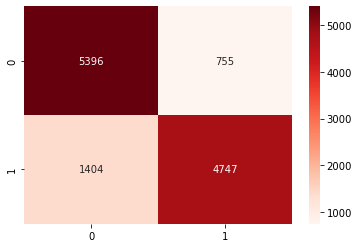

In [6]:
hyperp_search(classifier,parameters)

f1_train: 0.808450 using {'n_neighbors': 13}
f1=====
train: 0.837
test: 0.819
=====

Precision=====
train: 0.860
test: 0.842
=====

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      6151
           1       0.84      0.80      0.82      6151

    accuracy                           0.82     12302
   macro avg       0.82      0.82      0.82     12302
weighted avg       0.82      0.82      0.82     12302



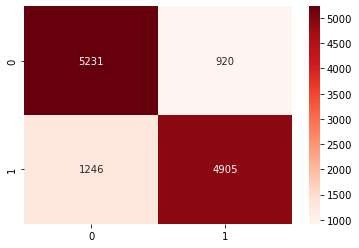

<Figure size 432x288 with 0 Axes>

In [9]:
parameters = {'n_neighbors':np.arange(8,15,1)}
hyperp_search(classifier, parameters)
plt.savefig('KNN_confusionMatrix.png', dpi = 200)

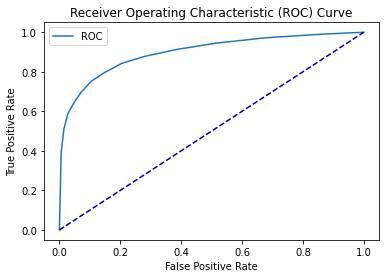

AUC: 0.90


In [10]:
model_knn = KNeighborsClassifier(n_neighbors=13)
fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

# Tree classification

In [13]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': np.arange(8,15,1),
              'min_samples_split': np.arange(8,15,1),
              'min_samples_leaf': np.arange(8,15,1)}

f1_train: 0.801301 using {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 8, 'min_samples_split': 10}
f1=====
train: 0.847
test: 0.815
=====

Precision=====
train: 0.880
test: 0.850
=====

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6151
           1       0.85      0.78      0.81      6151

    accuracy                           0.82     12302
   macro avg       0.82      0.82      0.82     12302
weighted avg       0.82      0.82      0.82     12302



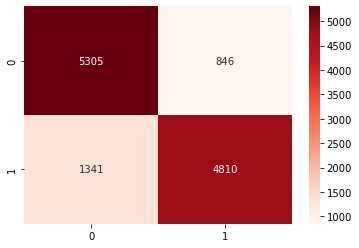

In [14]:
hyperp_search(classifier,parameters)

f1_train: 0.801153 using {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 9}
f1=====
train: 0.849
test: 0.816
=====

Precision=====
train: 0.881
test: 0.849
=====

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      6151
           1       0.85      0.79      0.82      6151

    accuracy                           0.82     12302
   macro avg       0.82      0.82      0.82     12302
weighted avg       0.82      0.82      0.82     12302



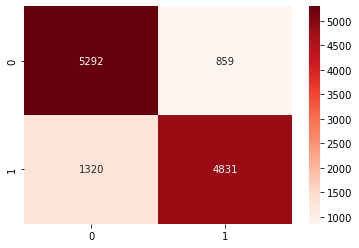

In [15]:
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': np.arange(5,12,1),
              'min_samples_split': np.arange(5,12,1),
              'min_samples_leaf': np.arange(5,15,1)}

hyperp_search(classifier,parameters)

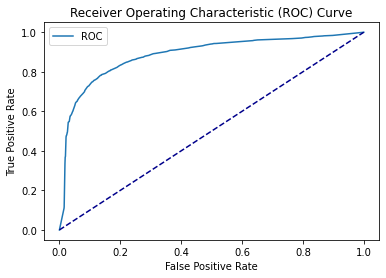

AUC: 0.89


In [16]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=11, min_samples_leaf=7, min_samples_split=9)
fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)

# Naive Bayes - Gaussian

In [19]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

f1_score:  0.7273464094666883
f1_test:  0.7273464094666883
[[4451 1700]
 [1664 4487]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.73      6151
           1       0.73      0.73      0.73      6151

    accuracy                           0.73     12302
   macro avg       0.73      0.73      0.73     12302
weighted avg       0.73      0.73      0.73     12302



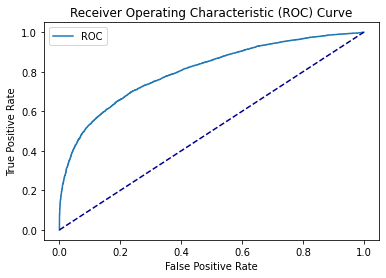

AUC: 0.80


In [20]:
fpr3,tpr3=roc(model,X_train,y_train,X_test,y_test)

# Logistic Regression

In [23]:
# Logistic

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], "max_iter":[1000] }

f1_train: 0.744039 using {'C': 1, 'max_iter': 1000}
f1=====
train: 0.744
test: 0.749
=====

Precision=====
train: 0.745
test: 0.752
=====

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      6151
           1       0.75      0.75      0.75      6151

    accuracy                           0.75     12302
   macro avg       0.75      0.75      0.75     12302
weighted avg       0.75      0.75      0.75     12302



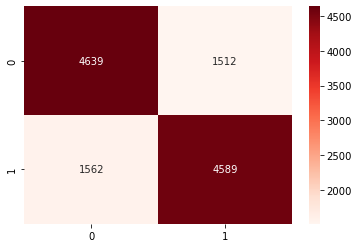

In [25]:
hyperp_search(classifier,parameters)

f1_train: 0.744039 using {'C': 1, 'max_iter': 1000}
f1=====
train: 0.744
test: 0.749
=====

Precision=====
train: 0.745
test: 0.752
=====

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      6151
           1       0.75      0.75      0.75      6151

    accuracy                           0.75     12302
   macro avg       0.75      0.75      0.75     12302
weighted avg       0.75      0.75      0.75     12302



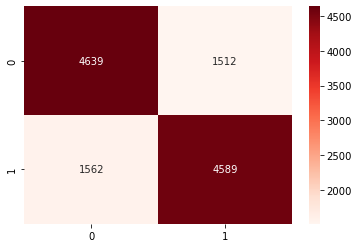

In [28]:
parameters = {"C":np.arange(1, 10,1), "max_iter": [1000]}
hyperp_search(classifier,parameters)

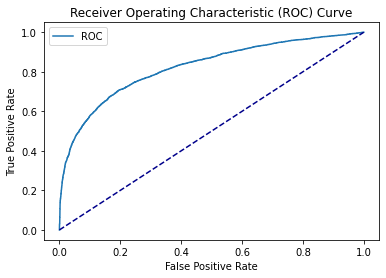

AUC: 0.82


In [29]:
model = LogisticRegression(C=10, max_iter=1000)

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)

In [32]:
model.fit(X_train,y_train)

coeff=pd.DataFrame()
coeff["feature"]=X_train.columns
coeff["w"]=model.coef_[0]

coeff.sort_values(by=['w'], inplace=True)

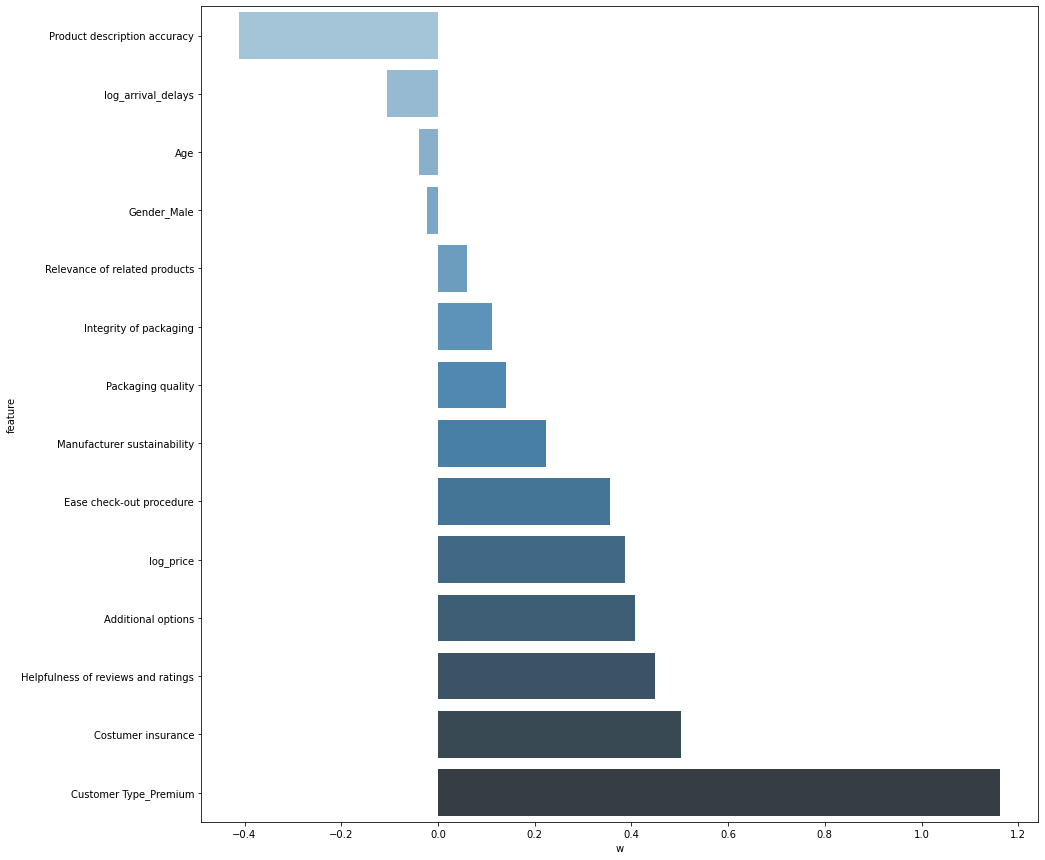

In [33]:
fig = plt.figure(figsize=(15,15))
sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")
sns.set(rc={'figure.figsize':(6,4)})

# SVM

In [34]:
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,100]}

f1_train: 0.818428 using {'C': 100, 'kernel': 'rbf'}
f1=====
train: 0.925
test: 0.835
=====

Precision=====
train: 0.940
test: 0.849
=====

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      6151
           1       0.85      0.82      0.84      6151

    accuracy                           0.84     12302
   macro avg       0.84      0.84      0.84     12302
weighted avg       0.84      0.84      0.84     12302



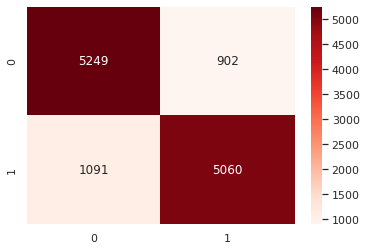

In [35]:
hyperp_search(classifier,parameters)

f1_train: 0.830153 using {'C': 10, 'kernel': 'rbf'}
f1=====
train: 0.881
test: 0.842
=====

Precision=====
train: 0.903
test: 0.871
=====

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      6151
           1       0.87      0.82      0.84      6151

    accuracy                           0.85     12302
   macro avg       0.85      0.85      0.85     12302
weighted avg       0.85      0.85      0.85     12302



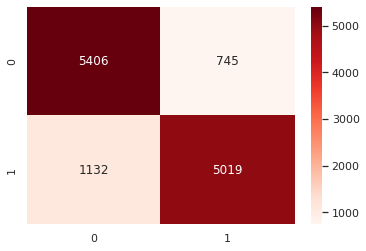

In [37]:
parameters = {"kernel":['rbf'], "C":[10,20]}
hyperp_search(classifier,parameters)

f1_train: 0.831718 using {'C': 6, 'kernel': 'rbf'}
f1=====
train: 0.872
test: 0.842
=====

Precision=====
train: 0.896
test: 0.871
=====

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      6151
           1       0.87      0.82      0.84      6151

    accuracy                           0.85     12302
   macro avg       0.85      0.85      0.85     12302
weighted avg       0.85      0.85      0.85     12302



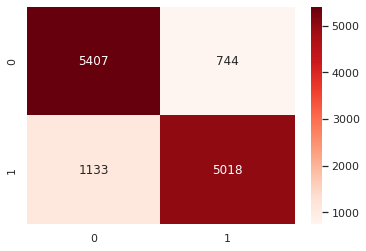

In [38]:
parameters = {"kernel":['rbf'], "C":[5, 6, 7, 8, 9]}
hyperp_search(classifier,parameters)

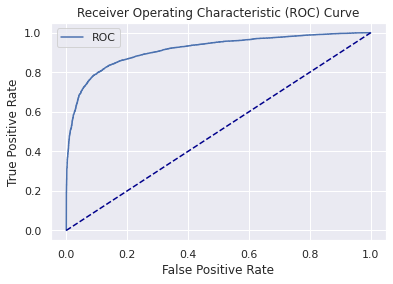

AUC: 0.92


In [39]:
model = SVC(C=6, kernel='rbf',probability=True)

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)

# Multi-layer perceptron

In [40]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [2000], "alpha": [0.001,0.1]}

f1_train: 0.833143 using {'alpha': 0.1, 'hidden_layer_sizes': (100, 20, 5), 'max_iter': 2000}
f1=====
train: 0.887
test: 0.848
=====

Precision=====
train: 0.917
test: 0.877
=====

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      6151
           1       0.88      0.82      0.85      6151

    accuracy                           0.85     12302
   macro avg       0.85      0.85      0.85     12302
weighted avg       0.85      0.85      0.85     12302



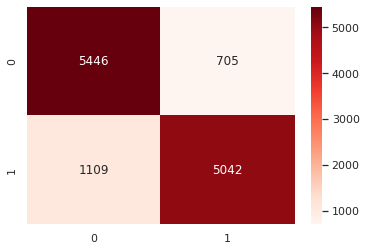

In [41]:
hyperp_search(classifier,parameters)

f1_train: 0.844602 using {'alpha': 0.7, 'hidden_layer_sizes': (150, 35, 7), 'max_iter': 2000}
f1=====
train: 0.859
test: 0.846
=====

Precision=====
train: 0.908
test: 0.897
=====

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      6151
           1       0.90      0.80      0.85      6151

    accuracy                           0.85     12302
   macro avg       0.86      0.85      0.85     12302
weighted avg       0.86      0.85      0.85     12302



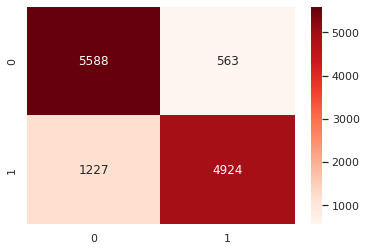

In [42]:
parameters = {"hidden_layer_sizes":[(100,20,5), (3,2,3), (100), (3), (150, 35, 7)],  "max_iter": [2000], "alpha": [0.1, 0.7]}
hyperp_search(classifier,parameters)

f1_train: 0.844051 using {'alpha': 0.7, 'hidden_layer_sizes': (180, 40, 10), 'max_iter': 2000}
f1=====
train: 0.862
test: 0.853
=====

Precision=====
train: 0.891
test: 0.881
=====

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      6151
           1       0.88      0.83      0.85      6151

    accuracy                           0.86     12302
   macro avg       0.86      0.86      0.86     12302
weighted avg       0.86      0.86      0.86     12302



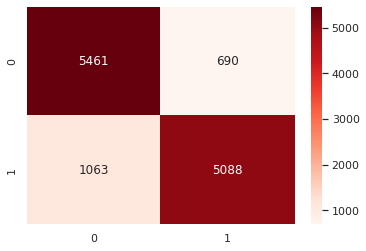

In [44]:
parameters = {"hidden_layer_sizes":[(150, 35, 7), (180, 40, 10)],  "max_iter": [2000], "alpha": [0.7, 0.8, 0.9]}
hyperp_search(classifier,parameters)

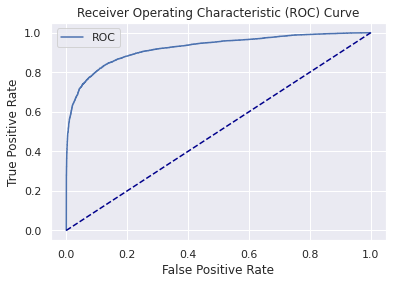

AUC: 0.92


In [45]:
model_MLP=MLPClassifier(hidden_layer_sizes=(180, 40, 10), alpha=0.7, max_iter=2000)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)

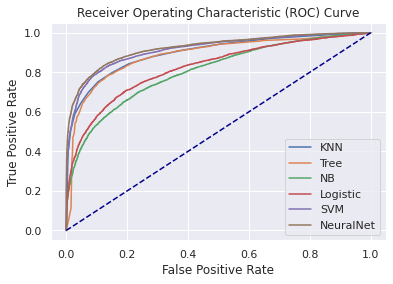

In [46]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Tree")
plt.plot(fpr3, tpr3, label= "NB")
plt.plot(fpr4, tpr4, label= "Logistic")    
plt.plot(fpr5, tpr5, label= "SVM")
plt.plot(fpr6, tpr6, label= "NeuralNet")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Random Forest Classifier

In [4]:
from sklearn.ensemble import RandomForestClassifier

model_rand = RandomForestClassifier()
parameters = {"n_estimators": np.arange(20,40,2),  "criterion": ['entropy', 'gini'], "max_depth": [4,5,6], 'min_samples_split':[2,3,4,5], 'min_samples_leaf': [2,3]}

f1_train: 0.784410 using {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 34}
f1=====
train: 0.782
test: 0.783
=====

Precision=====
train: 0.843
test: 0.852
=====

              precision    recall  f1-score   support

           0       0.76      0.87      0.81      6151
           1       0.85      0.72      0.78      6151

    accuracy                           0.80     12302
   macro avg       0.81      0.80      0.80     12302
weighted avg       0.81      0.80      0.80     12302



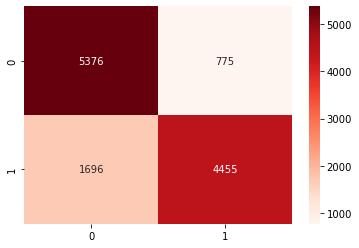

In [12]:
hyperp_search(model_rand, parameters)

f1_train: 0.784742 using {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 38}
f1=====
train: 0.787
test: 0.789
=====

Precision=====
train: 0.845
test: 0.855
=====



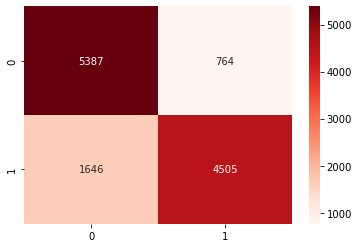

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      6151
           1       0.86      0.73      0.79      6151

    accuracy                           0.80     12302
   macro avg       0.81      0.80      0.80     12302
weighted avg       0.81      0.80      0.80     12302



In [14]:
parameters = {"n_estimators": np.arange(33,40,1),  "criterion": ['entropy', 'gini'], "max_depth": [4,5,6], 'min_samples_split':[2,3,4,5], 'min_samples_leaf': [2,3]}
hyperp_search(model_rand, parameters)

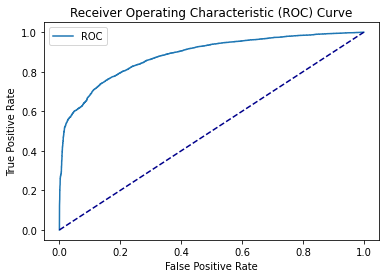

AUC: 0.88


In [15]:
model_for = RandomForestClassifier(criterion='gini', max_depth=6, min_samples_leaf=3,min_samples_split=5, n_estimators=38) 
fpr7,tpr7=roc(model_for,X_train,y_train,X_test,y_test)

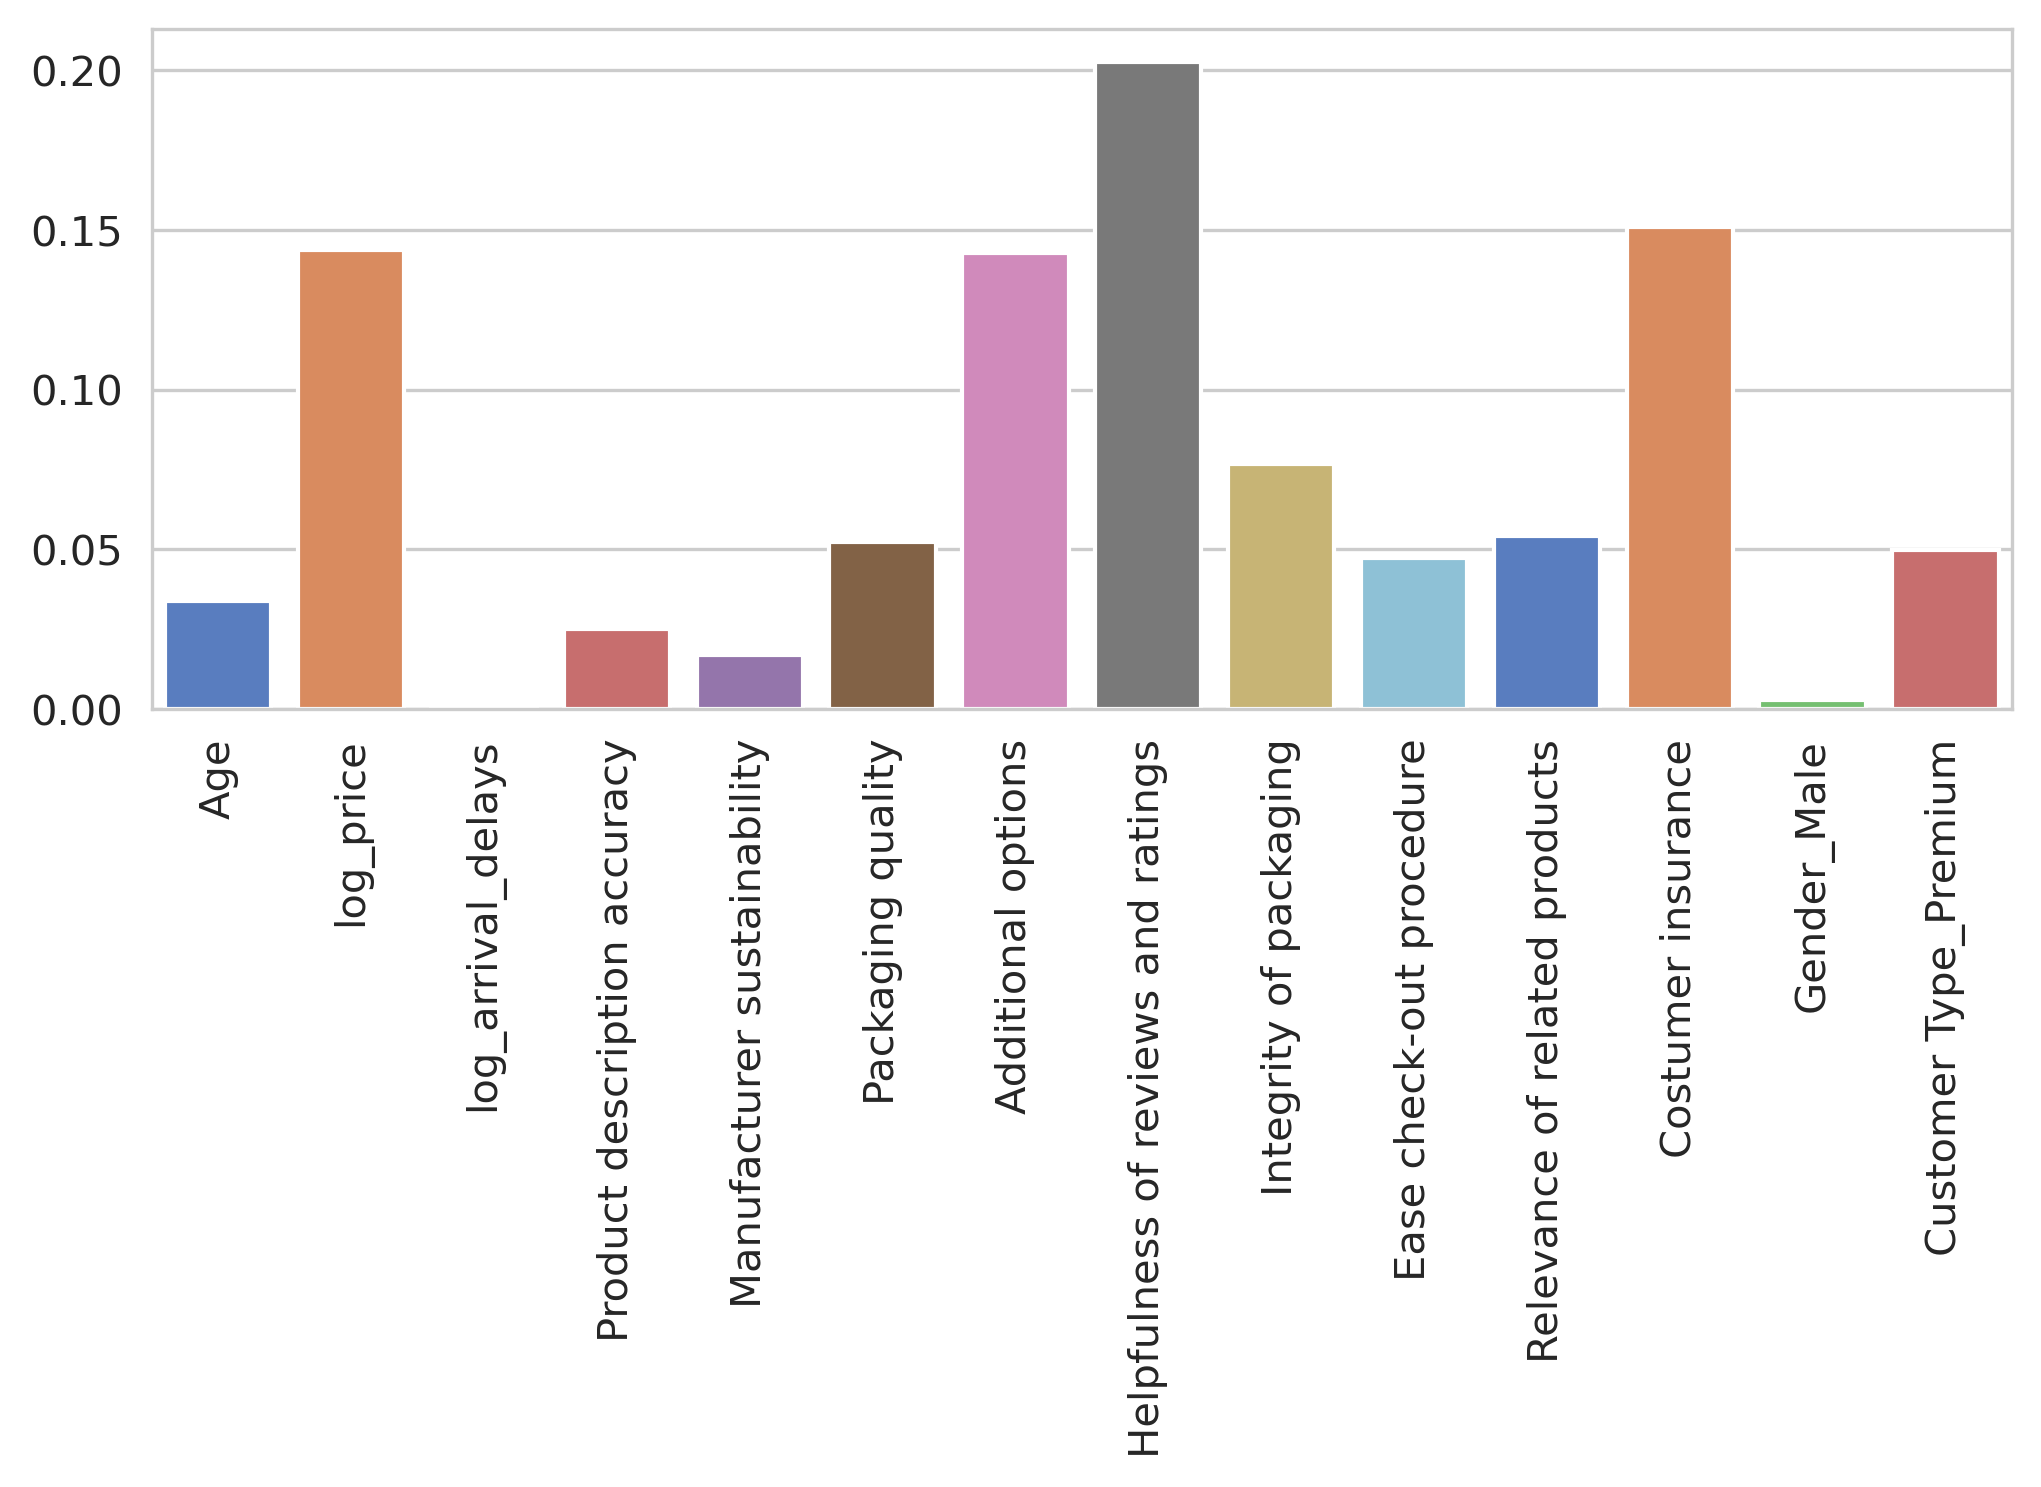

In [18]:
fig = plt.figure(figsize=(8,3), dpi = 300)
plt.xticks(rotation = 90)
sns.set_style('whitegrid')
sns.barplot(x=X_train.columns, y=model_for.feature_importances_, palette = 'muted')

# Adaboost 

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

model_tree = DecisionTreeClassifier(criterion='gini', max_depth=11, min_samples_leaf=7, min_samples_split=9)
adaboost = AdaBoostClassifier(n_estimators=1000, base_estimator=model_tree)
adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

y_pred_train = adaboost.predict(X_train)
print("f1_score test: ", metrics.f1_score(y_test, y_pred))
print("f1_score train: ", metrics.f1_score(y_train, y_pred_train))

f1_score test:  0.8446463117167129
f1_score train:  1.0


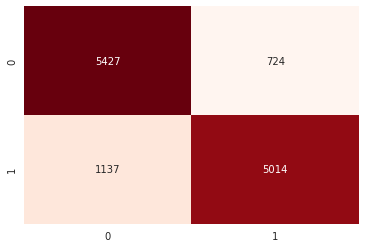

In [21]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);